![Autoencoder](../pictures/autoencoder.png)

#### Les autoencoders sont un type de réseaux de neurones artificiels utilisés pour effectuer une tâche d'encodage de données (representation learning).
#### Les autoencoders utilisent les mêmes données d'entrée pour l'entrée et la sortie
#### Les autoencoders fonctionnent en ajoutant un "bottleneck" dans le réseau. Ce "bottleneck" force le réseau à créer une version compressée (codée) de l'entrée d'origine
#### Les autoencoders fonctionnent bien s'il existe des corrélations entre les données d'entrée (fonctionnent mal si toutes les données d'entrée sont indépendantes)

### Importer les bibliothèques

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import cv2
import os

In [2]:
print("tensorflow version:" + str(tf.__version__))

tensorflow version:2.3.1


### Lecture d'images - Load dataset
#### Les images sont collectées à l'aide de ma webcam, vous pouvez utiliser les images de votre choix

In [12]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(folder,filename)),cv2.COLOR_BGR2RGB),(100,100))
        if img is not None:
            images.append(img)
    return np.array(images)
#Assurez-vous de changer le chemin
images=load_images_from_folder('../../data/josephimg')

In [13]:
print(images.shape)

(225, 100, 100, 3)


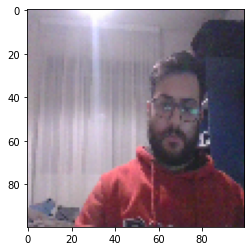

In [5]:
plt.imshow(images[1])

### visualisation de données

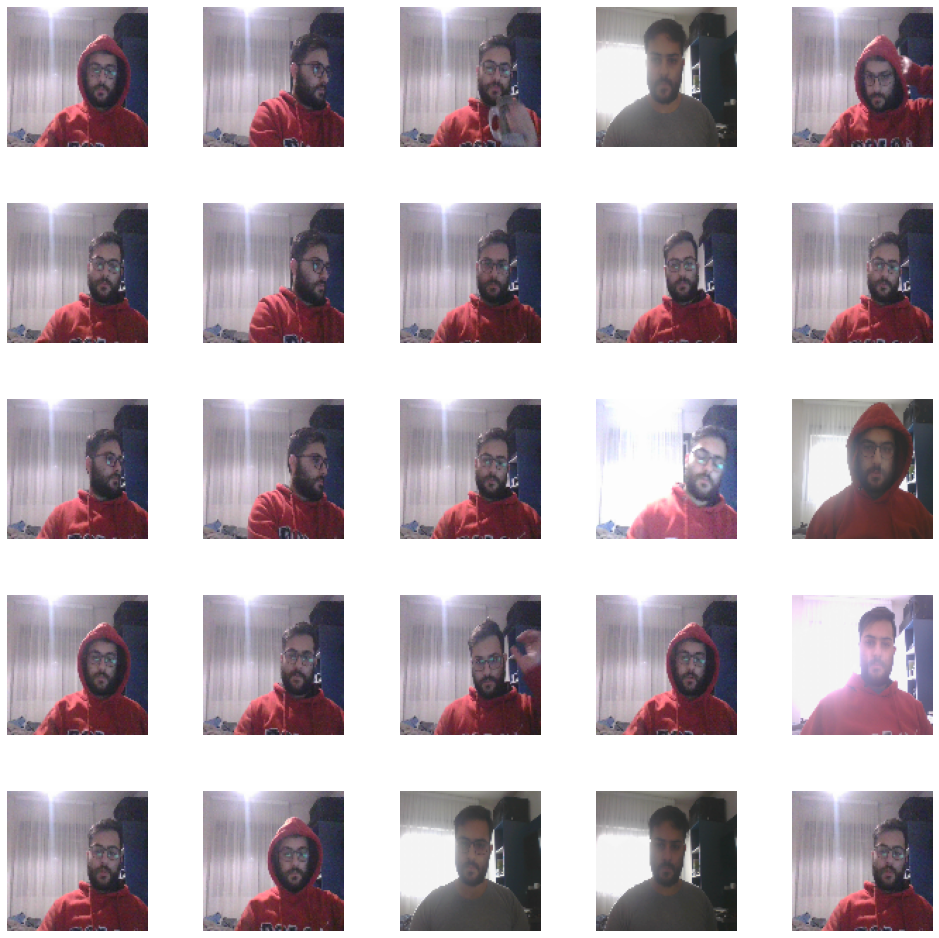

In [6]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n = len(images)
for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n)
    axes[i].imshow(images[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### prétraitement des données

In [14]:
images = images / 255

train = images[:190]
test=images[190:]

print(np.min(train))
print(np.max(train))

0.00784313725490196
1.0


### créer et former le modèle d'apprentissage en profondeur d'autoencoder

In [21]:
autoencoder = tf.keras.models.Sequential()

#encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding="same", kernel_initializer='he_uniform',
                                       input_shape=(images.shape[1], images.shape[2], images.shape[3])))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('elu'))
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),   
                   activation='elu', 
                   padding='same', kernel_initializer='he_uniform'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

#decoder CNN 
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding="same",kernel_initializer='he_uniform'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('elu'))
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),   
                   activation='elu', 
                   padding='same', kernel_initializer='he_uniform'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [22]:
autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 128)      

In [32]:
autoencoder.fit(train,          
          train, 
          epochs=150, 
          batch_size=5)

Epoch 1/150
38/38 [==============================] - 18s 468ms/step - loss: 0.0032
Epoch 2/150
38/38 [==============================] - 19s 504ms/step - loss: 0.0032
Epoch 3/150
38/38 [==============================] - 19s 500ms/step - loss: 0.0034
Epoch 4/150
38/38 [==============================] - 19s 496ms/step - loss: 0.0033
Epoch 5/150
38/38 [==============================] - 19s 499ms/step - loss: 0.0032
Epoch 6/150
38/38 [==============================] - 19s 494ms/step - loss: 0.0032
Epoch 7/150
38/38 [==============================] - 19s 500ms/step - loss: 0.0031
Epoch 8/150
38/38 [==============================] - 19s 496ms/step - loss: 0.0031
Epoch 9/150
38/38 [==============================] - 19s 498ms/step - loss: 0.0031
Epoch 10/150
38/38 [==============================] - 20s 519ms/step - loss: 0.0030
Epoch 11/150
38/38 [==============================] - 22s 570ms/step - loss: 0.0031
Epoch 12/150
38/38 [==============================] - 19s 497ms/step - loss: 0.0032
E

38/38 [==============================] - 19s 503ms/step - loss: 0.0023
Epoch 99/150
38/38 [==============================] - 19s 496ms/step - loss: 0.0023
Epoch 100/150
38/38 [==============================] - 19s 498ms/step - loss: 0.0024
Epoch 101/150
38/38 [==============================] - 19s 497ms/step - loss: 0.0022
Epoch 102/150
38/38 [==============================] - 21s 565ms/step - loss: 0.0021
Epoch 103/150
38/38 [==============================] - 19s 496ms/step - loss: 0.0024
Epoch 104/150
38/38 [==============================] - 19s 493ms/step - loss: 0.0020
Epoch 105/150
38/38 [==============================] - 19s 491ms/step - loss: 0.0024
Epoch 106/150
38/38 [==============================] - 19s 494ms/step - loss: 0.0022
Epoch 107/150
38/38 [==============================] - 19s 494ms/step - loss: 0.0021
Epoch 108/150
38/38 [==============================] - 19s 497ms/step - loss: 0.0023
Epoch 109/150
38/38 [==============================] - 19s 504ms/step - loss: 0.

### Évaluer le modèle

In [33]:
predicted = autoencoder.predict(test)

In [34]:
predicted.shape

(35, 100, 100, 3)

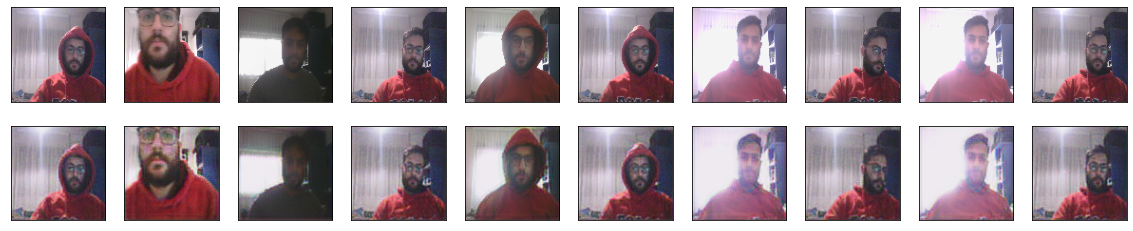

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for imgs, row in zip([test, predicted], axes):
    for img, ax in zip(imgs, row):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### Enregistrer le modèle

In [36]:
autoencoder.save_weights("simple_autoencoder_image_compression.h5")

### Les résultats ne sont pas parfaits, mais vous pouvez essayer d'améliorer les résultats en:

#### 1- Apprendre sur plus de données
#### 2- Régler les hyperparamètres
#### 3- Essayez une meilleure architecture